In [4]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
methods = {'No_Deconv':('-.o', 2), 
           'FPFS':('--^', 2),
           'Richard-Lucy(10)':('-D', 1.2), 'Richard-Lucy(20)':('-D', 2), 
           'Richard-Lucy(30)':('-D', 2.7), 'Richard-Lucy(50)':('-D', 3.3), 
        #    'Richard-Lucy(100)':('-D', 4),
           'Unrolled_ADMM(1)':('-*', 1.2), 'Unrolled_ADMM(2)':('-*', 2), 
           'Unrolled_ADMM(4)':('-*', 2.7), 'Unrolled_ADMM(8)':('-*', 3.3)}
snrs = [5, 10, 20, 40, 60, 80, 100, 150, 200]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


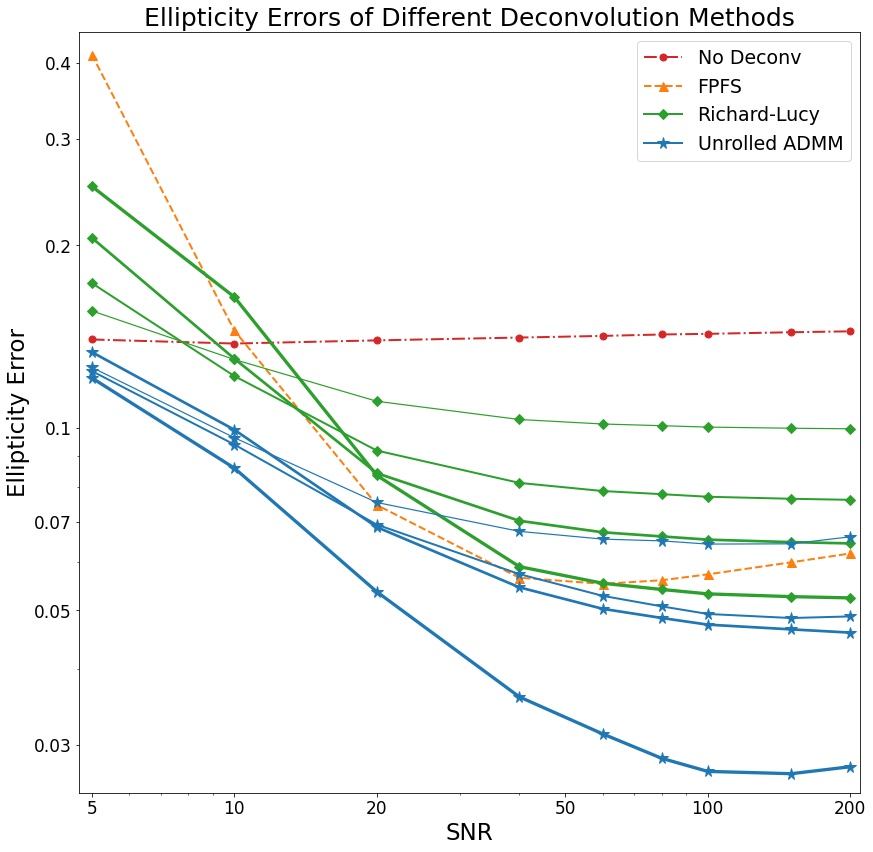

In [6]:
fig, ax1 = plt.subplots(figsize=(14,14), facecolor='white')

for method in methods:
    g_errs, g_stds = [], []
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results['20']['gt_shear'])
    results.pop('time')

    for snr in snrs:
        rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'FPFS' else 7))
    if methods[method][1] == 2:
        label = 'Unrolled ADMM' if 'ADMM' in method else ('Richard-Lucy' if 'Richard-Lucy' in method else ('No Deconv' if 'No' in method else method))
        ax1.plot(snrs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][1], markersize=markersize)
    else:
        ax1.plot(snrs, g_errs, methods[method][0], color=color, linewidth=methods[method][1], markersize=markersize)

ax1.set_ylim(0.025,0.45)
ax1.set_yscale('log', base=10)
ax1.set_yticks([0.03,0.05,0.07,0.1,0.2,0.3,0.4])
ax1.set_yticklabels(['0.03','0.05','0.07','0.1','0.2','0.3','0.4'])
ax1.set_ylabel('Ellipticity Error', fontsize=23)

ax1.set_xlim([4.7, 210])
ax1.set_xscale('log')
ax1.set_xticks([5,10,20,50,100,200])
ax1.set_xticklabels(['5','10','20','50','100','200'])
ax1.set_xlabel('SNR', fontsize=23)

plt.legend(fontsize=19)
plt.tick_params(labelsize=17)
plt.title('Ellipticity Errors of Different Deconvolution Methods', fontsize=25)
plt.savefig(os.path.join('figures', f'err_snr.eps'), bbox_inches='tight')